## Import

In [316]:
%pip install pandas numpy matplotlib seaborn plotly scipy scikit-learn
%pip install --upgrade nbformat


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objects as go
from pandas.plotting import scatter_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Read data

In [10]:
df = pd.read_csv("AAPL.csv")

In [11]:
DATA_COLUMNS = ["Open", "High", "Low", "Adj Close", "Close", "Volume"]

## Visualize data

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-07-31,221.44,223.82,220.63,222.08,222.08,49901700
1,2024-07-30,219.19,220.33,216.12,218.80,218.80,41643800
2,2024-07-29,216.96,219.30,215.75,218.24,218.24,36311800
3,2024-07-26,218.70,219.49,216.01,217.96,217.96,41601300
4,2024-07-25,218.93,220.85,214.62,217.49,217.49,51391200


In [14]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,1.099800e+04
mean,22.319359,22.559407,22.088450,22.332987,21.539547,3.180852e+08
std,46.042365,46.535133,45.579786,46.076558,45.654227,3.354484e+08
min,0.050000,0.050000,0.050000,0.050000,0.040000,1.388800e+06
25%,0.300000,0.300000,0.290000,0.300000,0.240000,1.132545e+08
50%,0.530000,0.540000,0.520000,0.530000,0.430000,2.057412e+08
75%,20.240000,20.405000,20.015000,20.200000,17.277500,3.985275e+08
max,236.480000,237.230000,233.090000,234.820000,234.820000,7.421641e+09


### Candle stick chart

In [15]:
fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)])
fig.show()

### Univariative graph

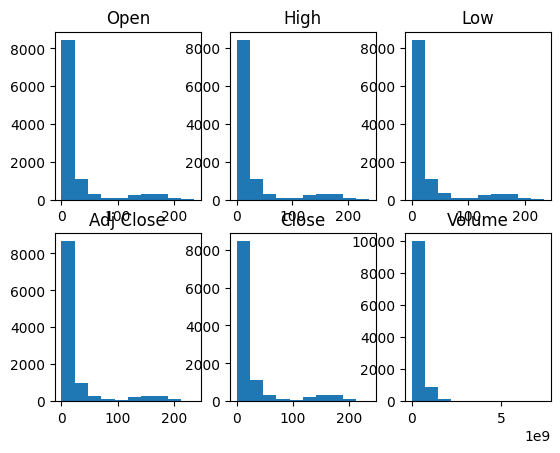

In [16]:
for i, column in enumerate(DATA_COLUMNS):
    plt.subplot(2, 3, i + 1)
    plt.title(column)
    plt.hist(df[column])
plt.show()

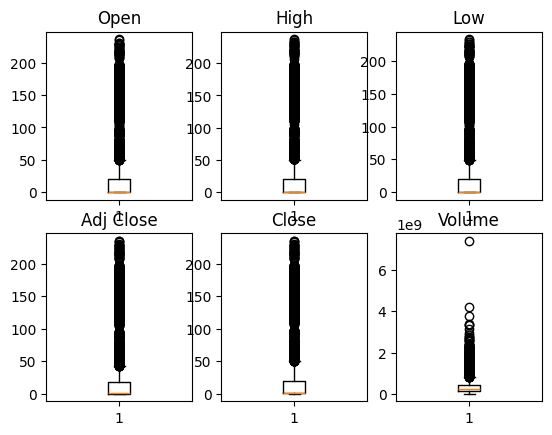

In [17]:
for i, column in enumerate(DATA_COLUMNS):
    plt.subplot(2, 3, i + 1)
    plt.title(column)
    plt.boxplot(df[column])
plt.show()

### Multivariative graph

array([[<Axes: xlabel='Open', ylabel='Open'>,
        <Axes: xlabel='High', ylabel='Open'>,
        <Axes: xlabel='Low', ylabel='Open'>,
        <Axes: xlabel='Close', ylabel='Open'>,
        <Axes: xlabel='Adj Close', ylabel='Open'>,
        <Axes: xlabel='Volume', ylabel='Open'>],
       [<Axes: xlabel='Open', ylabel='High'>,
        <Axes: xlabel='High', ylabel='High'>,
        <Axes: xlabel='Low', ylabel='High'>,
        <Axes: xlabel='Close', ylabel='High'>,
        <Axes: xlabel='Adj Close', ylabel='High'>,
        <Axes: xlabel='Volume', ylabel='High'>],
       [<Axes: xlabel='Open', ylabel='Low'>,
        <Axes: xlabel='High', ylabel='Low'>,
        <Axes: xlabel='Low', ylabel='Low'>,
        <Axes: xlabel='Close', ylabel='Low'>,
        <Axes: xlabel='Adj Close', ylabel='Low'>,
        <Axes: xlabel='Volume', ylabel='Low'>],
       [<Axes: xlabel='Open', ylabel='Close'>,
        <Axes: xlabel='High', ylabel='Close'>,
        <Axes: xlabel='Low', ylabel='Close'>,
        <Axes:

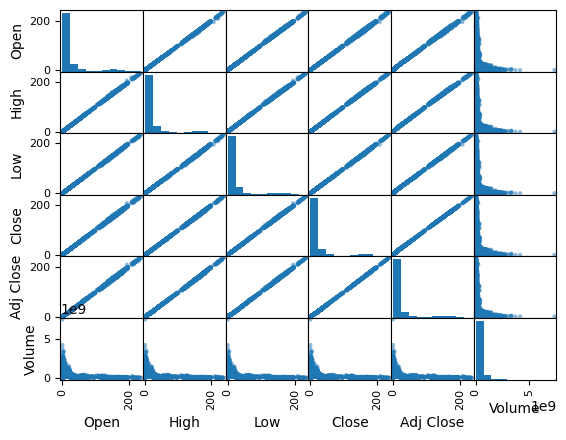

In [18]:
scatter_matrix(df)

## Convert date to unix timestamp

In [19]:
def into_unix_timestamp(raw_date):
    parsed_date = datetime.strptime(raw_date, "%Y-%m-%d")
    return int(datetime.timestamp(parsed_date))

df['Date'] = df['Date'].map(into_unix_timestamp)

In [20]:
df.sort_values(by=['Date'], inplace=True)

## Handle missing data

In [22]:
# Only check for NaN since all data are numerical
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [23]:
temp = pd.DataFrame(IterativeImputer().fit_transform(df))
temp.columns = df.columns

df = temp

In [24]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Handling skewness

In [25]:
df.skew()

Date         0.002635
Open         2.515494
High         2.513208
Low          2.517536
Close        2.515092
Adj Close    2.561710
Volume       3.564728
dtype: float64

In [332]:
# Handling skewness using log since the data is left skew
#
# df[DATA_COLUMNS] = df[DATA_COLUMNS].apply(lambda s: np.log(s))

## Save data

In [26]:
df.to_csv("AAPL.csv")